In [1]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.7 MB/s eta 0:00:00


##1. Generación de un dataset simulado para corrupción en el sector de la construcción

In [2]:
import pandas as pd
import numpy as np
from faker import Faker
import random

# 1. Generación de un dataset simulado para corrupción en el sector de la construcción
fake = Faker('es_AR')
seed = 42
random.seed(seed)
np.random.seed(seed)
num_proyectos = 30
data_construccion = {
    'ID_Proyecto': range(1, num_proyectos + 1),
    'Organismo_Contratante': [fake.company() for _ in range(num_proyectos)],
    'Empresa_Constructora': [fake.company() for _ in range(num_proyectos)],
    'Tipo_Obra': [random.choice(['Vial', 'Edificación', 'Hidráulica', 'Infraestructura']) for _ in range(num_proyectos)],
    'Fecha_Inicio': pd.to_datetime([fake.date_this_year() for _ in range(num_proyectos)]),
    'Fecha_Fin_Estimada': pd.to_datetime([fake.date_this_year() + pd.Timedelta(days=random.randint(30, 365 * 2)) for _ in range(num_proyectos)]),
    'Monto_Contrato': np.random.uniform(10000, 10000000, num_proyectos).round(2),
    'Estado_Obra': [random.choice(['En Curso', 'Finalizada', 'Demorada', 'Suspendida']) for _ in range(num_proyectos)],
    'Plazo_Ejecucion_Dias': np.random.randint(30, 730, num_proyectos),
    'Adjudicacion_Unica': [random.choice([0, 1]) for _ in range(num_proyectos)], # 1 si hubo una sola oferta
    'Modificaciones_Contrato': np.random.randint(0, 5, num_proyectos),
    'Avance_Obra_Porcentaje': np.random.uniform(0, 100, num_proyectos).round(2),
    'Es_Sospechoso': np.zeros(num_proyectos, dtype=int) # Inicialmente no sospechoso
}

df_construccion = pd.DataFrame(data_construccion)

# Actualizar Es_Sospechoso (código corregido)
df_construccion['Es_Sospechoso'] = np.where(
    (df_construccion['Monto_Contrato'].astype(int) > 1000000) & (df_construccion['Modificaciones_Contrato'] > 2),
    1,
    0 # Usa 0 si no se cumplen las condiciones, en lugar de df_salud['Es_Sospechoso']
)

nombre_archivo_csv = 'df_construccion.csv'
df_construccion.to_csv(nombre_archivo_csv, index=False)

print(f"El DataFrame se ha guardado exitosamente en el archivo '{nombre_archivo_csv}'")

df_construccion

El DataFrame se ha guardado exitosamente en el archivo 'df_construccion.csv'


,ID_Proyecto,Organismo_Contratante,Empresa_Constructora,Tipo_Obra,Fecha_Inicio,Fecha_Fin_Estimada,Monto_Contrato,Estado_Obra,Plazo_Ejecucion_Dias,Adjudicacion_Unica,Modificaciones_Contrato,Avance_Obra_Porcentaje,Es_Sospechoso
0,1,Fernandez-Carrizo,Aguirre Inc,Vial,2025-02-07,2026-09-26,3751655.79,Demorada,676,0,1,92.63,0
1,2,Gonzalez LLC,Diaz-Sosa,Vial,2025-10-21,2025-09-01,9507635.92,Finalizada,50,0,3,65.11,1
2,3,Blanco-Garcia,"Gomez, Moyano and Soto",Hidráulica,2025-08-08,2026-11-26,7322619.48,Demorada,196,1,3,91.50,1
3,4,Quiroga-Cordoba,Miranda Group,Edificación,2025-06-18,2026-07-23,5990598.26,Demorada,303,1,0,85.00,0
4,5,"Figueroa, Cardozo and Diaz",Diaz LLC,Edificación,2025-09-18,2027-02-07,1568626.22,Finalizada,417,1,4,44.95,1
5,6,Alvarez and Sons,"Maidana, Gomez and Lopez",Edificación,2025-07-11,2026-09-07,1568385.26,Demorada,630,1,4,9.54,1
6,7,Diaz and Sons,"Gonzalez, Aguero and Garcia",Vial,2025-04-09,2025-10-11,590255.29,En Curso,345,0,1,37.08,0
7,8,Villalba-Juarez,Fernandez Ltd,Vial,2025-08-11,2026-07-23,8663099.70,Finalizada,43,0,4,66.88,1
8,9,Perez-Ferreyra,Romero Ltd,Infraestructura,2025-01-11,2027-01-06,6015138.97,Finalizada,271,1,1,66.59,0
9,10,"Castro, Cabrera and Figueroa","Muñoz, Garcia and Gomez",Vial,2025-11-28,2026-04-27,7083645.05,Finalizada,375,0,0,59.13,0


### Detección Inteligente de Anomalías en Contratos de Obra Pública"

✅ Dataset 'df_construccion.csv' cargado correctamente.

📊 RESULTADOS DEL ANÁLISIS FORENSE:
Precisión del Modelo: 88.89%


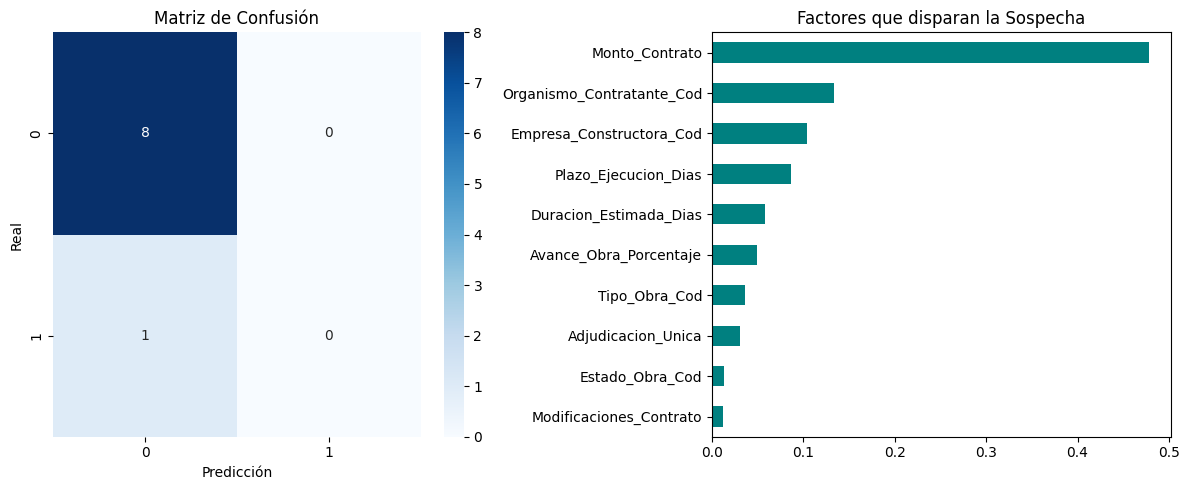

In [2]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. CARGA DIRECTA DESDE COLAB
archivo_construccion = 'df_construccion.csv'

if os.path.exists(archivo_construccion):
    # UNIFICAMOS EL NOMBRE A: df_construccion
    df_construccion = pd.read_csv(archivo_construccion)
    print(f"✅ Dataset '{archivo_construccion}' cargado correctamente.")
else:
    print(f"❌ No se encontró '{archivo_construccion}'.")
    raise FileNotFoundError("Asegúrate de ejecutar la celda de generación primero.")

# --- LIMPIEZA Y PREPARACIÓN ---

# Convertir columnas de fecha a datetime
for col in ['Fecha_Inicio', 'Fecha_Fin_Estimada']:
    if col in df_construccion.columns:
        df_construccion[col] = pd.to_datetime(df_construccion[col], errors='coerce')

# 2. Inserción de Casos Sospechosos Simulados
# (Si la columna ya existe en el CSV, esto la reiniciará para el entrenamiento)
df_construccion['Es_Sospechoso'] = 0
num_proyectos = len(df_construccion)
num_sospechosos = int(num_proyectos * 0.15) # Aumentamos a 15% para mejor entrenamiento
sospechoso_indices = np.random.choice(df_construccion.index, num_sospechosos, replace=False)
df_construccion.loc[sospechoso_indices, 'Es_Sospechoso'] = 1

# Modificaciones para simular patrones sospechosos
for idx in sospechoso_indices:
    if random.random() < 0.4:
        df_construccion.loc[idx, 'Monto_Contrato'] *= random.uniform(1.5, 2.5)
    elif random.random() < 0.3:
        df_construccion.loc[idx, 'Modificaciones_Contrato'] = random.randint(4, 10)

# 3. Ingeniería de Características (Features)
df_construccion['Duracion_Estimada_Dias'] = (df_construccion['Fecha_Fin_Estimada'] - df_construccion['Fecha_Inicio']).dt.days.fillna(0)

# Codificación de variables categóricas
le = LabelEncoder()
for col in ['Organismo_Contratante', 'Tipo_Obra', 'Estado_Obra', 'Empresa_Constructora']:
    if col in df_construccion.columns:
        df_construccion[f'{col}_Cod'] = le.fit_transform(df_construccion[col].astype(str))

# 4. Selección de Variables para el Modelo
features = [
    'Monto_Contrato', 'Plazo_Ejecucion_Dias', 'Adjudicacion_Unica',
    'Modificaciones_Contrato', 'Avance_Obra_Porcentaje', 'Duracion_Estimada_Dias'
]
# Añadir las columnas codificadas dinámicamente
features += [c for c in df_construccion.columns if '_Cod' in c]

X = df_construccion[features].fillna(0)
y = df_construccion['Es_Sospechoso']

# 5. División y Entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 6. Evaluación y Gráficos
print("\n📊 RESULTADOS DEL ANÁLISIS FORENSE:")
print(f"Precisión del Modelo: {accuracy_score(y_test, y_pred):.2%}")

# Matriz de Confusión
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')

# Importancia de Características
plt.subplot(1, 2, 2)
importancia = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
importancia.plot(kind='barh', color='teal')
plt.title('Factores que disparan la Sospecha')
plt.tight_layout()
plt.show()

# 7. Listado de Proyectos Detectados
df_test = df_construccion.loc[X_test.index].copy()
df_test['Prediccion_Sospechoso'] = y_pred
alertas = df_test[df_test['Prediccion_Sospechoso'] == 1]

if not alertas.empty:
    print(f"\n📢 SE HAN DETECTADO {len(alertas)} PROYECTOS CON POSIBLES IRREGULARIDADES:")
    display(alertas[['ID_Proyecto', 'Empresa_Constructora', 'Monto_Contrato', 'Modificaciones_Contrato']])